# Tugas Kecil 1 IF3270 Pembelajaran Mesin

### Anggota Kelompok
### - 13519057 Kadek Dwi Bagus
### - 13519217 Hughie Alghaniyyu Emiliano

#### Import Dataset Play Tennis

In [1]:
import pandas as pd

df = pd.read_csv("play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


##### Drop Unused Feature & Encoding Data 

In [2]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

df = df.drop(['day'], axis=1)

df['outlook'] = labelEncoder.fit_transform(df['outlook'])
df['temp'] = labelEncoder.fit_transform(df['temp'])
df['humidity'] = labelEncoder.fit_transform(df['humidity'])
df['wind'] = labelEncoder.fit_transform(df['wind'])
df['play'] = labelEncoder.fit_transform(df['play'])
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


##### Split Data Feature with Result

In [3]:
data = df.drop(['play'], axis=1)
result = df.play

#### Split Dataset to 80% for Training and 20% for Testing

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_result, test_result = train_test_split(data, result, test_size=0.20)
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

train_percentage = round((training_data.shape[0] / (training_data.shape[0] + testing_data.shape[0])) * 100, 2)
print(f"Amount of training data : {training_data.shape[0]} ({train_percentage}%)")

test_percentage = round((testing_data.shape[0] / (training_data.shape[0] + testing_data.shape[0])) * 100, 2)
print(f"Amount of testing data  : {testing_data.shape[0]} ({test_percentage}%)")

Amount of training data : 11 (78.57%)
Amount of testing data  : 3 (21.43%)


##### Training Data

In [5]:
train_data

,outlook,temp,humidity,wind
10,2,2,1,0
3,1,2,0,1
13,1,2,0,0
0,2,1,0,1
12,0,1,1,1
1,2,1,0,0
8,2,0,1,1
6,0,0,1,0
9,1,2,1,1
2,0,1,0,1


##### Training Result

In [6]:
train_result

10    1
3     1
13    0
0     0
12    1
1     0
8     1
6     1
9     1
2     1
7     0
Name: play, dtype: int32

##### Testing Data

In [7]:
test_data

,outlook,temp,humidity,wind
5,1,0,1,0
4,1,0,1,1
11,0,2,0,0


##### Testing Result

In [8]:
test_result

5     0
4     1
11    1
Name: play, dtype: int32

#### Decision Tree Classifier

[Text(0.6666666666666666, 0.875, 'X[2] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.5, 0.625, 'X[0] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.3333333333333333, 0.375, 'X[3] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

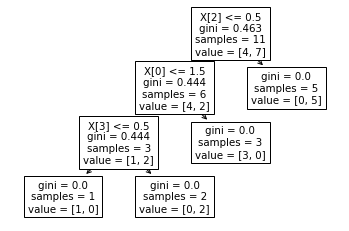

In [9]:
from sklearn import tree

clfDTC = tree.DecisionTreeClassifier()
clfDTC = clfDTC.fit(train_data, train_result)
tree.plot_tree(clfDTC)

In [10]:
from sklearn import metrics

prediction = clfDTC.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[0 1]
 [1 1]]


In [11]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [12]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.3333333333333333
Precision    : 0.5
Recall       : 0.5


ID3 ESTIMATOR

In [14]:
from id3.id3 import Id3Estimator
estimator = Id3Estimator()

In [15]:
estimator = estimator.fit(train_data, train_result)

In [16]:
prediction = estimator.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))
print(metrics.classification_report(test_result, prediction))

[[0 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [17]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.3333333333333333
Precision    : 0.5
Recall       : 0.5


#### K-Means

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train_data)
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [19]:
kmeans.cluster_centers_

array([[0.        , 0.66666667, 0.66666667, 0.66666667],
       [1.625     , 1.5       , 0.375     , 0.625     ]])

In [20]:
from sklearn import metrics

prediction = kmeans.fit_predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [1 1]]


In [21]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [22]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_data, train_result)

LogisticRegression(solver='liblinear')

In [100]:
from sklearn import metrics

prediction=logreg.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[0 1]
 [0 2]]


In [101]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [102]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 0.6666666666666666
Recall       : 1.0


#### Neural Network MLP Classifier

In [103]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=1, solver='lbfgs')
mlpc.fit(train_data, train_result)

MLPClassifier(random_state=1, solver='lbfgs')

In [104]:
from sklearn import metrics

prediction=logreg.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[0 1]
 [0 2]]


In [105]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [106]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 0.6666666666666666
Recall       : 1.0


#### SVM

In [111]:
from sklearn import svm 

clfSVM = svm.SVC()
clfSVM.fit(train_data, train_result)

SVC()

In [112]:
prediction = clfSVM.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[0 1]
 [0 2]]


In [113]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [114]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 0.6666666666666666
Recall       : 1.0
